In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [4]:
breast=datasets.load_breast_cancer()

In [5]:
print(breast.data.shape)

(569, 30)


In [6]:
print(breast.target.shape)

(569,)


In [7]:
print(breast.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
print(breast.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [9]:
print('Target: 1:{},2:{},3:{}'.format(np.sum(breast.target==0),np.sum(breast.target==1),np.sum(breast.target==2)))

Target: 1:212,2:357,3:0


In [10]:


df=pd.DataFrame(breast.data)

In [11]:
print(df.head())

      0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9   ...     20     21      22      23      24      25      26      27  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  
0  0.4601  0.11890  
1 

In [12]:
df.columns=breast.feature_names
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [13]:
df['Price']=breast.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [14]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Price
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [15]:
x_train,x_test,y_train,y_test=train_test_split(breast.data,breast.target,test_size=0.15,random_state=42)

In [16]:
scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.fit_transform(x_test)

In [17]:
print(x_train_std.shape)

(483, 30)


In [18]:
print(x_test_std.shape)

(86, 30)


In [19]:
print(y_train.shape)

(483,)


In [20]:
print(y_test.shape)

(86,)


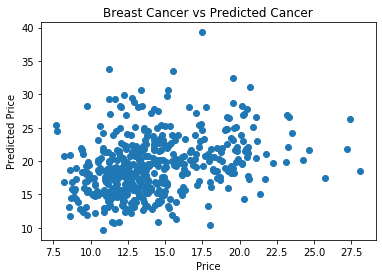

In [21]:
plt.scatter(x_train[:,:1],x_train[:,1:2])
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title("Breast Cancer vs Predicted Cancer")
plt.show()

In [22]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_pred=model.predict(x_test)

In [24]:
print(model.coef_)

[ 1.78091001e-01 -7.20552892e-03 -2.07344098e-02 -2.13063038e-04
  8.50150133e-01  5.02123533e+00 -1.15576527e+00 -4.80563458e+00
  1.43758214e-01 -4.50786816e+00 -3.82975742e-01  1.06300619e-02
  5.01946136e-03  1.11995274e-03 -1.74928349e+01  1.91697214e+00
  4.22380323e+00 -1.68405282e+01  8.25466544e-01  1.11381691e+00
 -2.08544560e-01 -5.62702420e-03  8.29376829e-03  9.00424922e-04
 -5.53285347e-01 -7.09457288e-01 -5.52247126e-01  1.06733445e+00
 -1.00956976e+00 -1.30737640e+00]


In [25]:
print('Intercept:%.3f'%model.intercept_)

Intercept:3.022


In [26]:
y_pred=model.predict(x_test)

In [27]:
print(y_pred[:5])

[0.624834   0.16391607 0.26606379 1.13565618 1.12529677]


Text(0.5, 1.0, 'Breast cancer datasets prediction')

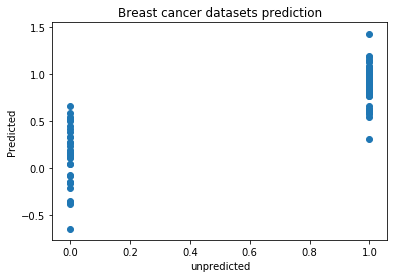

In [28]:
plt.scatter(y_test,y_pred)
plt.xlabel('unpredicted')
plt.ylabel('Predicted')
plt.title('Breast cancer datasets prediction')

In [29]:
print(y_test)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0]


In [30]:
print(y_pred)

[ 0.624834    0.16391607  0.26606379  1.13565618  1.12529677 -0.64422097
 -0.08766948  0.44505911  0.30503213  0.95822964  0.80098808  0.32957702
  0.90725964  0.38942987  0.93631406  0.17211026  0.89796523  1.19185592
  1.43222702  0.0427836   0.65672044  0.88576819 -0.38201225  1.09163504
  0.95667669  0.83138339  0.9956012   0.86889292  0.95251419 -0.15745068
  1.02307601  1.04155679  0.81465455  0.91188972  1.07482138  0.82808039
  0.49844909  0.62508094  0.23956602  0.77250144  1.14870104  0.03982073
  0.97120416  0.99906679  0.54897922  0.66116074  0.92731195  1.02429651
  0.8199061   1.02043946  0.18944395 -0.0779037   0.5806863   0.59838203
  1.02256033  0.77629664  0.94606799 -0.34814732  0.5440176   1.04126507
  0.9544208  -0.20964037 -0.35874185  0.79971869  0.91619894  0.59706039
 -0.16329375 -0.14794739  0.9867486   0.8276877   0.11572161  0.10421037
  0.85830438  0.27421322  0.99059839  0.83490882  0.81590146  0.5857394
  1.18305382  0.76739807  0.41715307  1.0644591   0.

In [31]:
print("mean squared error:%.3f"%mean_squared_error(y_test,y_pred))

mean squared error:0.071


In [32]:
print("accuracy_score: %.3f"%model.score(x_test,y_test))

accuracy_score: 0.696
